## Student Performance Indicator - EDA

### 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
- Dataset Source - [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data consists of 8 column and 1000 rows.

In [1]:
# Importing required dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('data/stud_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### Dataset information
- Gender - M/F
- race_ethnicity - Group A, B, C, D
- parental_level_of_education - (Bachelor's, some Clg, master, associate, high school)
- lunch - std, free/red
- test_preparation_course - none, completed
- math score
- reading score
- writing score

### Checks to perform 
- Missing Values
- Duplicates
- Data type
- No. of Unique vals in each cols
- stats of datasets
- Various categoires present in cols

In [5]:
# Missing vals
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in Dataset

In [7]:
df.duplicated().sum()

np.int64(0)

There is no duplicate value present in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights
- All means are close to each other - between 66 and 68.05
- All std are also close to each other - 14.6 and 15.19
- While the min score for Math is 0, for writing its 10 and reading 17

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"Categories in {col} variable :   {df[col].unique()}")

Categories in gender variable :   ['female' 'male']
Categories in race_ethnicity variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable :   ['standard' 'free/reduced']
Categories in test_preparation_course variable :   ['none' 'completed']


In [15]:
cat_col = [feat for feat in df.columns if df[feat].dtype == 'O']
num_col = [feat for feat in df.columns if df[feat].dtype != 'O']

num_col, cat_col

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

### 3. Feature Engineering 
- Adding column for Total Score and Average score 

In [20]:
df['total_score'] = np.zeros(len(df))
for col in num_col :
    df['total_score']+=df[col]
df['avg_score'] = df.total_score/3

df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
963,female,group C,some high school,free/reduced,completed,65,76,75,216.0,72.000000
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,140.0,46.666667
255,female,group E,some college,standard,none,62,73,70,205.0,68.333333
954,female,group C,some college,standard,none,62,69,69,200.0,66.666667
293,female,group E,bachelor's degree,standard,none,65,73,75,213.0,71.000000


In [22]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['avg_score'].count()
math_less_20 = df[df['math_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights : 
- Worst Performance is in Math
- Best Performance is in Reading

### Viz
Making viz of avg_score distribution 
- Histogram
- KDE

<Axes: xlabel='avg_score', ylabel='Count'>

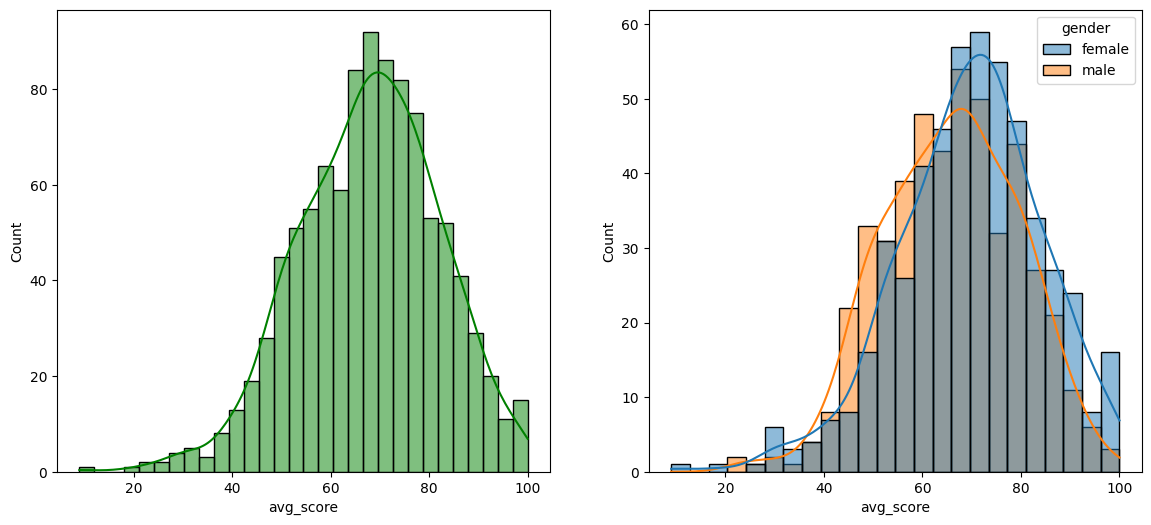

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, hue = 'gender')

Female students are tend to score better than the male students. This can also be seen same from the Total score graph

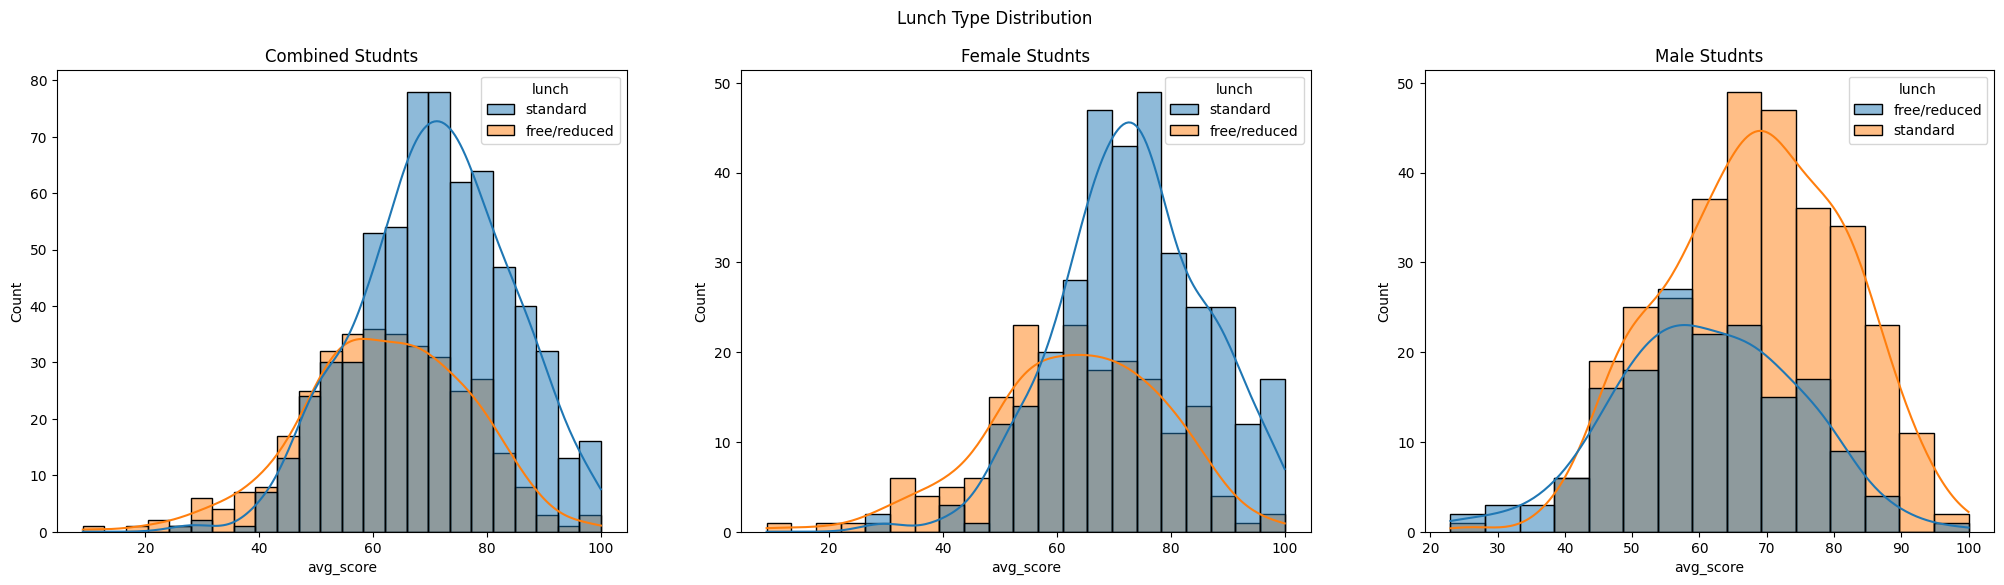

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.title("Combined Studnts")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.title("Female Studnts")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.title("Male Studnts")
plt.suptitle('Lunch Type Distribution')
plt.show()

Students with Std lunch performs better than the Free / Reduced events - For Combined / Male / Female

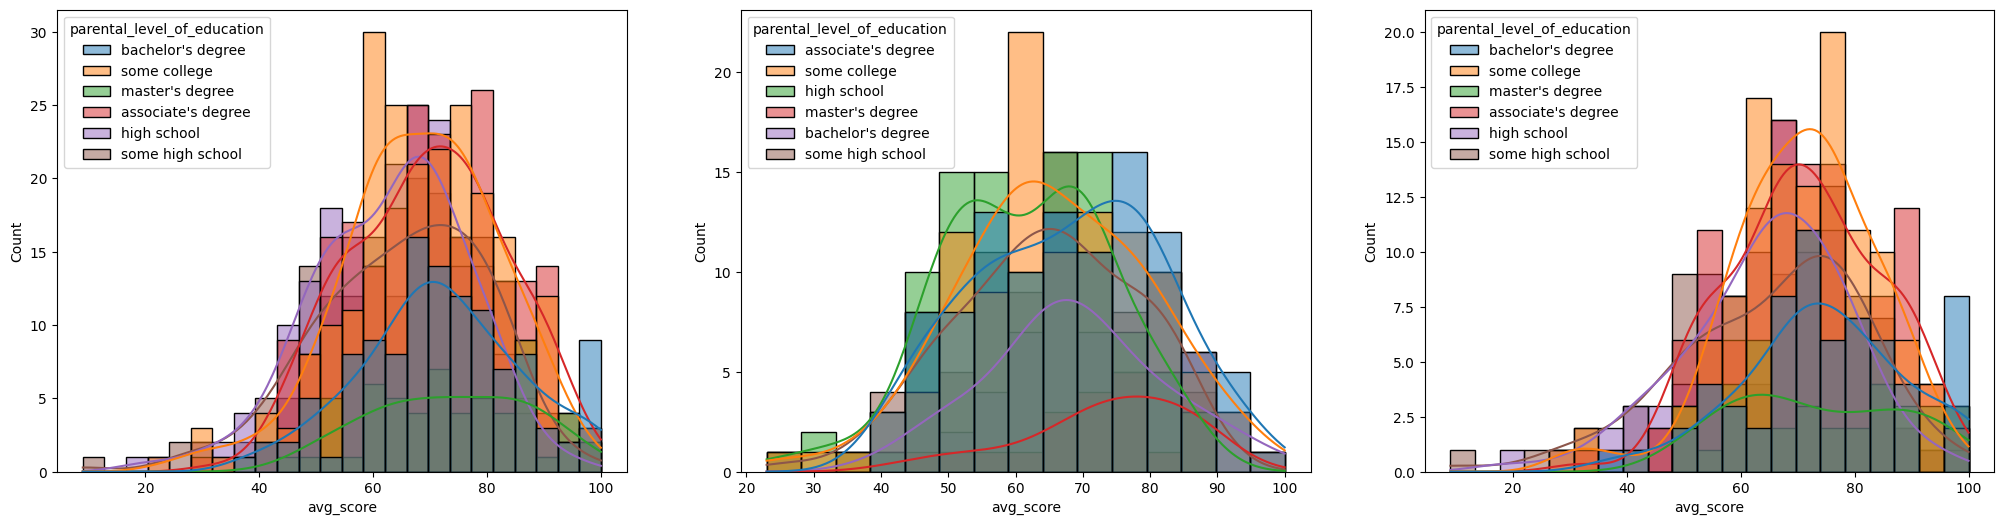

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.show()

INSIGHTS :
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

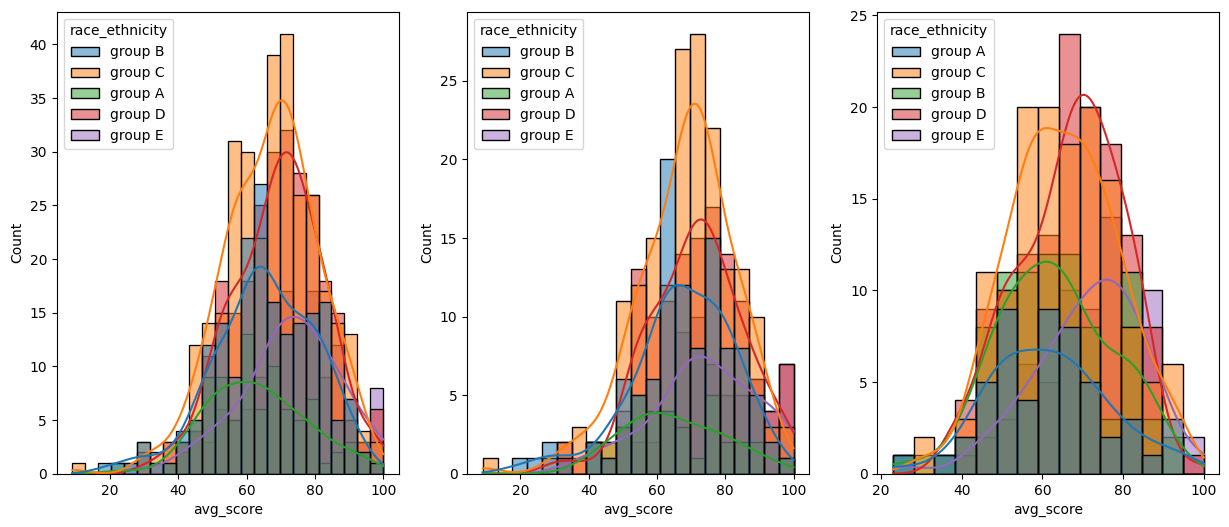

In [39]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

Skipping some of the Analysis